In [14]:
# Data: time-serie data from smartwatch or smartwatch data
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as spio

# Data reading
# The smartwatch historical/time-seris data to visualize
# data_path_1xn = 'data/smartwatch_data/experimental_data_analysis/Basis_Watch_Data.csv'
data_path = '/home/arasdar/data/Training_data/DATA_01_TYPE01.mat'
# watch_txn = pd.read_csv(data_path_1xn)
watch = spio.loadmat(data_path)
data = watch['sig']
data = np.array(data)
data.shape, watch['sig'].size/6

# Normalizing each batch of the data, each batch = each file
# Can we normalize them all at the same time?
mean = np.mean(data, axis=1)
var = np.var(data, axis=1)
std = np.sqrt(var)
mean.shape, var.shape, std.shape
mean = mean.reshape(-1, 1)
std = std.reshape(-1, 1)
mean.shape, std.shape
data_norm = (data - mean)/std
data.shape, data_norm.shape

((6, 37937), (6, 37937))

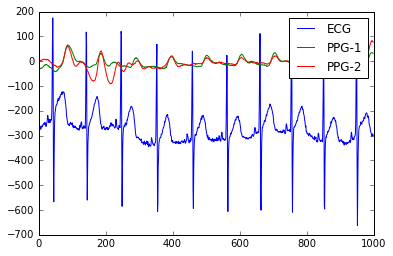

In [15]:
# The features/ channels of the data = ['HR-ECG', 'HR-PPG', 'ACC-X', 'ACC-Y', 'ACC-Z']
plt.plot(data[0, :1000], label='ECG')
plt.plot(data[1, :1000], label='PPG-1')
plt.plot(data[2, :1000], label='PPG-2')
# plt.plot(x_sig[3, :1000], label='ACC-X')
# plt.plot(x_sig[4, :1000], label='SCC-Y')
# plt.plot(x_sig[5, :1000], label='ACC-Z')
plt.legend()
plt.show()

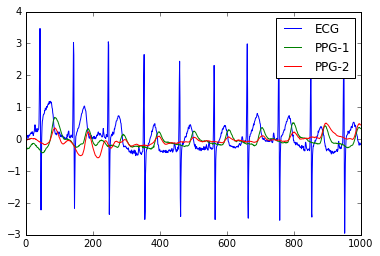

In [16]:
# The features/ channels of the data = ['HR-ECG', 'HR-PPG', 'ACC-X', 'ACC-Y', 'ACC-Z']
plt.plot(data_norm[0, :1000], label='ECG')
plt.plot(data_norm[1, :1000], label='PPG-1')
plt.plot(data_norm[2, :1000], label='PPG-2')
# plt.plot(x_sig[3, :1000], label='ACC-X')
# plt.plot(x_sig[4, :1000], label='SCC-Y')
# plt.plot(x_sig[5, :1000], label='ACC-Z')
plt.legend()
plt.show()

((37937, 5), (37937, 1))

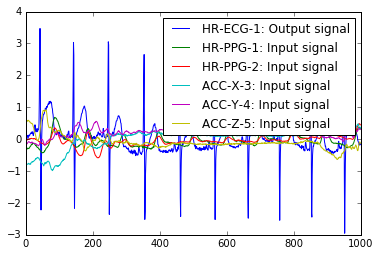

In [17]:
# ECG
Y = data_norm[0]
X = data_norm[1:]
Y.shape, X.shape
Y = Y.reshape(1, -1)
Y.shape, X.shape
plt.plot(Y[0, :1000], label='HR-ECG-1: Output signal')
plt.plot(X[0, :1000], label='HR-PPG-1: Input signal')
plt.plot(X[1, :1000], label='HR-PPG-2: Input signal')
plt.plot(X[2, :1000], label='ACC-X-3: Input signal')
plt.plot(X[3, :1000], label='ACC-Y-4: Input signal')
plt.plot(X[4, :1000], label='ACC-Z-5: Input signal')
plt.legend()
X_train = X.T
Y_train = Y.T
X_train.shape, Y_train.shape

In [18]:
# Data reading
# The smartwatch historical/time-seris data to visualize
# data_path_1xn = 'data/smartwatch_data/experimental_data_analysis/Basis_Watch_Data.csv'
data_path_valid = '/home/arasdar/data/Extra_TrainingData/DATA_S04_T01.mat'
# watch_txn = pd.read_csv(data_path_1xn)
watch = spio.loadmat(data_path_valid)
data = watch['sig']
data = np.array(data)
data.shape, watch['sig'].size/6

# Normalizing each batch of the data, each batch = each file
# Can we normalize them all at the same time?
mean = np.mean(data, axis=1)
var = np.var(data, axis=1)
std = np.sqrt(var)
mean.shape, var.shape, std.shape
mean = mean.reshape(-1, 1)
std = std.reshape(-1, 1)
mean.shape, std.shape
valid_data_norm = (data - mean)/std
data.shape, data_norm.shape

((6, 27576), (6, 37937))

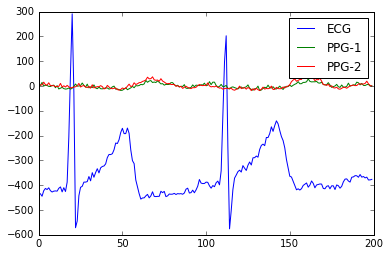

In [19]:
# The features/ channels of the data = ['HR-ECG', 'HR-PPG', 'ACC-X', 'ACC-Y', 'ACC-Z']
plt.plot(data[0, :200], label='ECG')
plt.plot(data[1, :200], label='PPG-1')
plt.plot(data[2, :200], label='PPG-2')
# plt.plot(x_sig[3, :1000], label='ACC-X')
# plt.plot(x_sig[4, :1000], label='SCC-Y')
# plt.plot(x_sig[5, :1000], label='ACC-Z')
plt.legend()
plt.show()

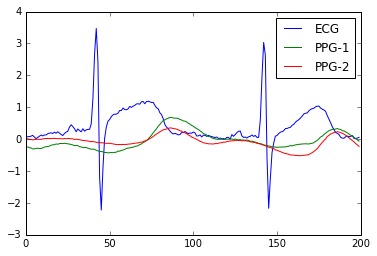

In [20]:
# The features/ channels of the data = ['HR-ECG', 'HR-PPG', 'ACC-X', 'ACC-Y', 'ACC-Z']
plt.plot(data_norm[0, :200], label='ECG')
plt.plot(data_norm[1, :200], label='PPG-1')
plt.plot(data_norm[2, :200], label='PPG-2')
# plt.plot(x_sig[3, :1000], label='ACC-X')
# plt.plot(x_sig[4, :1000], label='SCC-Y')
# plt.plot(x_sig[5, :1000], label='ACC-Z')
plt.legend()
plt.show()

((37937, 5), (37937, 1))

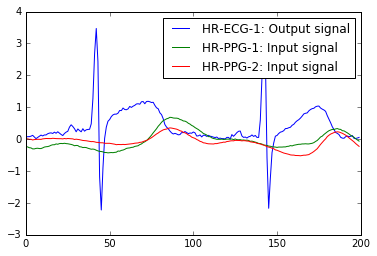

In [21]:
# ECG
Y = data_norm[0]
X = data_norm[1:]
Y.shape, X.shape
Y = Y.reshape(1, -1)
Y.shape, X.shape
plt.plot(Y[0, :200], label='HR-ECG-1: Output signal')
plt.plot(X[0, :200], label='HR-PPG-1: Input signal')
plt.plot(X[1, :200], label='HR-PPG-2: Input signal')
# plt.plot(X[2, :200], label='ACC-X-3: Input signal')
# plt.plot(X[3, :200], label='ACC-Y-4: Input signal')
# plt.plot(X[4, :200], label='ACC-Z-5: Input signal')
plt.legend()
X_valid = X.T
Y_valid = Y.T
X_valid.shape, Y_valid.shape

In [40]:
# Model or Network
import impl.loss as loss_fun
import impl.layer as l
import impl.utils as util
import impl.NN as nn

class GRU(nn.NN):

    def __init__(self, D, H, L, C):
        self.D = D # number of input dimensions
        self.H = H # number of hidden units
        self.L = L # number of hidden layers
        self.C = C # number of output classes/dimensions
        self.losses = {'train':[], 'valid':[]} #, 'test':[]
        super().__init__(D, D, H, None, None, loss='cross_ent', nonlin='relu')

    def _init_model(self, D, C, H):
        Z = H + D
        m = dict(
            Wz=np.random.randn(Z, H) / np.sqrt(Z / 2.),
            Wr=np.random.randn(Z, H) / np.sqrt(Z / 2.),
            Wh=np.random.randn(Z, H) / np.sqrt(Z / 2.),
            Wy=np.random.randn(H, D) / np.sqrt(D / 2.),
            bz=np.zeros((1, H)),
            br=np.zeros((1, H)),
            bh=np.zeros((1, H)),
            by=np.zeros((1, D))
        )

        self.model = []
        for layer in range(self.L):
            self.model.append(m)
            
        # Output layer: This is the last layer for regression
        m_out = dict(
            Wout=np.random.randn(D, C) / np.sqrt(C / 2.),
            bout=np.zeros((1, C))
        ) 
        # As the last layer for regression
        self.model.append(m_out)

    def initial_state(self):
        return np.zeros((1, self.H))

    def forward(self, X, h, m):
        Wz, Wr, Wh, Wy = m['Wz'], m['Wr'], m['Wh'], m['Wy']
        bz, br, bh, by = m['bz'], m['br'], m['bh'], m['by']

        X_one_hot = X.copy()
        h_old = h.copy()

        X = np.column_stack((h_old, X_one_hot))

        hz, hz_cache = l.fc_forward(X, Wz, bz)
        hz, hz_sigm_cache = l.sigmoid_forward(hz)

        hr, hr_cache = l.fc_forward(X, Wr, br)
        hr, hr_sigm_cache = l.sigmoid_forward(hr)

        X_prime = np.column_stack((hr * h_old, X_one_hot))
        hh, hh_cache = l.fc_forward(X_prime, Wh, bh)
        hh, hh_tanh_cache = l.tanh_forward(hh)

        h = (1. - hz) * h_old + hz * hh

        y, y_cache = l.fc_forward(h, Wy, by)

        cache = (
            X, X_prime, h_old, hz, hz_cache, hz_sigm_cache, hr, hr_cache, hr_sigm_cache,
            hh, hh_cache, hh_tanh_cache, h, y_cache
        )

        return y, h, cache

    def backward(self, dy, dh, cache):
        X, X_prime, h_old, hz, hz_cache, hz_sigm_cache, hr, hr_cache, hr_sigm_cache, hh, hh_cache, hh_tanh_cache, h, y_cache = cache
        
        dh_next = dh.copy()

        dh, dWy, dby = l.fc_backward(dy, y_cache)
        dh += dh_next

        dhh = hz * dh
        dh_old1 = (1. - hz) * dh
        dhz = hh * dh - h_old * dh

        dhh = l.tanh_backward(dhh, hh_tanh_cache)
        dX_prime, dWh, dbh = l.fc_backward(dhh, hh_cache)

        dh_prime = dX_prime[:, :self.H]
        dh_old2 = hr * dh_prime

        dhr = h_old * dh_prime
        dhr = l.sigmoid_backward(dhr, hr_sigm_cache)
        dXr, dWr, dbr = l.fc_backward(dhr, hr_cache)

        dhz = l.sigmoid_backward(dhz, hz_sigm_cache)
        dXz, dWz, dbz = l.fc_backward(dhz, hz_cache)

        dX = dXr + dXz
        dh_old3 = dX[:, :self.H]

        dh = dh_old1 + dh_old2 + dh_old3
        dX = dX[:, self.H:]

        grad = dict(Wz=dWz, Wr=dWr, Wh=dWh, Wy=dWy, bz=dbz, br=dbr, bh=dbh, by=dby)
        
        return dX, dh, grad

    def train_forward(self, X_train, h):
        ys, caches = [], []
        h_init = h.copy()
        h = []
        for layer in range(self.L):
            h.append(h_init.copy())
            caches.append([])
        
        # Adding the output layer cache
        caches.append([])
            
        for X in X_train:
            y = X.reshape(1, -1)
            
            # RNN hidden layer: learning the representation
            for layer in range(self.L):
                y, h[layer], cache = self.forward(y, h[layer], self.model[layer])
                caches[layer].append(cache)
            
            # Output layer: regression
            y, cache = l.fc_forward(y, self.model[self.L]['Wout'], self.model[self.L]['bout'])
            caches[self.L].append(cache)
            ys.append(y)
            
        return ys, caches

    def l2_regression_NEW(self, y_pred, y_train):
        m = y_pred.shape[0]

        # (F(x)-y)^2: convex as X^2 or (aX-b)^2
        data_loss = 0.5 * np.sum((y_pred - y_train)**2) / m
    
        return data_loss

    def dl2_regression_NEW(self, y_pred, y_train):
        m = y_pred.shape[0]

        # (F(x)-y)^2: convex as X^2 or (aX-b)^2
        dy = (y_pred - y_train) / m

        return dy

    def loss_function(self, y_train, ys):
        loss, dys = 0.0, []

        for y_pred, y in zip(ys, y_train):
            loss += self.l2_regression_NEW(y_pred, y)/ y_train.shape[0]
            dy = self.dl2_regression_NEW(y_pred, y)
            dys.append(dy)
            
        return loss, dys

    def train_backward(self, dys, caches):
        dh, grad, grads = [], [], []
        
        # The RNN hidden layers gradients
        for layer in range(self.L+1):
            dh.append(np.zeros((1, self.H)))
            grad.append({key: np.zeros_like(val) for key, val in self.model[layer].items()})
            grads.append({key: np.zeros_like(val) for key, val in self.model[layer].items()})
            
        for t in reversed(range(len(dys))):
            
            #             dX = dys[t]
            # Output layer gradient
            dX, dWout, dbout = l.fc_backward(dys[t], caches[self.L][t])
            grad[self.L]['Wout'] = dWout
            grad[self.L]['bout'] = dbout
            for k in grad[self.L].keys():
                grads[self.L][k] += grad[self.L][k]

            # RNN hidden layers gradients
            for layer in reversed(range(self.L)):
                dX, dh[layer], grad[layer] = self.backward(dX, dh[layer], caches[layer][t])
                for k in grad[layer].keys():
                    grads[layer][k] += grad[layer][k]
                
        return dX, grads

In [41]:
from sklearn.utils import shuffle as skshuffle
import impl.constant as c

def get_minibatch(X, y, minibatch_size, shuffle=True):
    minibatches = []

    if shuffle:
        X, y = skshuffle(X, y)

    for i in range(0, X.shape[0], minibatch_size):
        X_mini = X[i:i + minibatch_size]
        y_mini = y[i:i + minibatch_size]

        minibatches.append((X_mini, y_mini))

    return minibatches

def read_data(data_path):
    watch = spio.loadmat(data_path)
    data = watch['sig']
    data = np.array(data)
    data.shape, watch['sig'].size/6

    # Normalizing each batch of the data, each batch = each file
    # Can we normalize them all at the same time?
    mean = np.mean(data, axis=1)
    var = np.var(data, axis=1)
    std = np.sqrt(var)
    mean.shape, var.shape, std.shape
    mean = mean.reshape(-1, 1)
    std = std.reshape(-1, 1)
    mean.shape, std.shape
    data_norm = (data - mean)/std
    #     print(data.shape, data_norm.shape)
    
    # ECG
    Y = data_norm[0]
    X = data_norm[1:]
    # Y.shape, X.shape
    Y = Y.reshape(1, -1)
    # Y.shape, X.shape
    X = X.T
    Y = Y.T
    #     print(X_train.shape, Y_train.shape)
    return X, Y

def adam_rnn(nn, X_train, Y_train, X_valid, Y_valid, iter_epoch, alpha, mb_size): # n_iter, print_after

    minibatches = get_minibatch(X_train, Y_train, mb_size, shuffle=False)
    #     minibatches_valid = get_minibatch(X_valid, Y_valid, mb_size, shuffle=False)

    M, R = [], []
    for layer in range(nn.L+1):
        M.append({k: np.zeros_like(v) for k, v in nn.model[layer].items()})
        R.append({k: np.zeros_like(v) for k, v in nn.model[layer].items()})

    beta1 = .9
    beta2 = .999
    state = nn.initial_state()

    # The training to learn the gradients/derivatives
    #             if idx >= len(minibatches):
    #                 idx = 0
    #     #             state = nn.initial_state()
    for idx in range(len(minibatches)):

        X_mini, y_mini = minibatches[idx]
        ys, caches = nn.train_forward(X_mini, state)
        loss_train, dys = nn.loss_function(y_mini, ys)
        _, grads = nn.train_backward(dys, caches)
        nn.losses['train'].append(loss_train)

        #         # Validation
        #         if idx_valid >= len(minibatches_valid):
        #             idx_valid = 0

        #         X_mini, y_mini = minibatches_valid[idx_valid]
        #         ys, _ = nn.train_forward(X_mini, state)
        #         loss_valid, _ = nn.loss_function(y_mini, ys)
        #         # _, grads = nn.train_backward(dys, caches)
        #         nn.losses['valid'].append(loss_valid)
        #         idx_valid += 1

        #         # Print loss of training and validation
        #         if iter % print_after == 0:
        #             #             print('Iter-{} training loss: {:.4f}'.format(iter, loss_train), 'validation loss: {:.4f}'.format(loss_valid))            
        print('Iter-{} training loss: {:.4f}'.format(iter_epoch, loss_train))
            
        for layer in range(nn.L+1):
            for k in grads[layer].keys(): #key, value: items
                M[layer][k] = util.exp_running_avg(M[layer][k], grads[layer][k], beta1)
                R[layer][k] = util.exp_running_avg(R[layer][k], grads[layer][k]**2, beta2)

                m_k_hat = M[layer][k] / (1. - (beta1**(iter_epoch)))
                r_k_hat = R[layer][k] / (1. - (beta2**(iter_epoch)))

                nn.model[layer][k] -= alpha * m_k_hat / (np.sqrt(r_k_hat) + c.eps)
    
    return nn

In [42]:
# hyper parameters
n_iter = 13 # epochs
n_files = 0 # 12 is the total number of files in the training dataset
alpha = 1e-3 # learning_rate
print_after = 1 # print loss of train, valid, and test
time_step = 200 # width of the model or minibatch size
num_hidden_units = 64 # width of the hidden layers or number of hidden units in hidden layer
num_hidden_layers = 1 # depth or number of hidden layer
num_input_units = X_train.shape[1] # number of input features/dimensions
num_output_units = Y_train.shape[1] # number of output units, features, and dimensions

In [ ]:
net = GRU(D=num_input_units, H=num_hidden_units, L=num_hidden_layers, C=num_output_units)

# Epcochs iterations
for iter_epoch in range(1, n_iter + 1):

    # Data file
    #     for iter in range(1, n_files+1):
    iter = 1
    if iter == 1: data_path = '/home/arasdar/data/Training_data/DATA_{:02}_TYPE01.mat'.format(iter)
    else: data_path = '/home/arasdar/data/Training_data/DATA_{:02}_TYPE02.mat'.format(iter)
    print(data_path) 
    print(data_path_valid)

    # Read the mat files, normalize each batch of them, and seperate the output and input
    X_train, Y_train = read_data(data_path=data_path)

    adam_rnn(nn=net, X_train=X_train, Y_train=Y_train, X_valid=X_valid, Y_valid=Y_valid, 
             iter_epoch=iter_epoch, alpha=alpha, mb_size=time_step) # n_iter=n_iter, print_after=print_after

/home/arasdar/data/Training_data/DATA_01_TYPE01.mat
/home/arasdar/data/Extra_TrainingData/DATA_S04_T01.mat
Iter-1 training loss: 9.2298
Iter-1 training loss: 8.5656
Iter-1 training loss: 5.5978
Iter-1 training loss: 3.3391
Iter-1 training loss: 2.0906
Iter-1 training loss: 1.7175
Iter-1 training loss: 1.9735
Iter-1 training loss: 1.5100
Iter-1 training loss: 1.2811
Iter-1 training loss: 2.6835
Iter-1 training loss: 2.0984
Iter-1 training loss: 1.6496
Iter-1 training loss: 1.2577
Iter-1 training loss: 1.1519
Iter-1 training loss: 1.1397
Iter-1 training loss: 1.0097
Iter-1 training loss: 1.4085
Iter-1 training loss: 2.2964
Iter-1 training loss: 1.3481
Iter-1 training loss: 1.3010
Iter-1 training loss: 1.4292
Iter-1 training loss: 1.4937
Iter-1 training loss: 2.3687
Iter-1 training loss: 8.4787
Iter-1 training loss: 2.7849
Iter-1 training loss: 1.7403
Iter-1 training loss: 2.6249
Iter-1 training loss: 7.7494
Iter-1 training loss: 3.5689
Iter-1 training loss: 5.0167
Iter-1 training loss: 4

Iter-2 training loss: 2.6558
Iter-2 training loss: 2.4888
Iter-2 training loss: 3.2793
Iter-2 training loss: 2.3441
Iter-2 training loss: 2.8059
Iter-2 training loss: 3.1272
Iter-2 training loss: 2.8572
Iter-2 training loss: 3.0770
Iter-2 training loss: 3.3482
Iter-2 training loss: 2.6841
Iter-2 training loss: 3.0511
Iter-2 training loss: 2.8376
Iter-2 training loss: 3.2789
Iter-2 training loss: 3.4052
Iter-2 training loss: 2.5506
Iter-2 training loss: 2.9222
Iter-2 training loss: 3.1480
Iter-2 training loss: 2.8681
Iter-2 training loss: 3.1375
Iter-2 training loss: 3.2981
Iter-2 training loss: 3.0299
Iter-2 training loss: 2.5277
Iter-2 training loss: 3.5088
Iter-2 training loss: 3.6603
Iter-2 training loss: 2.9485
Iter-2 training loss: 2.4875
Iter-2 training loss: 3.0425
Iter-2 training loss: 2.9546
Iter-2 training loss: 2.5413
Iter-2 training loss: 3.2557
Iter-2 training loss: 3.0066
Iter-2 training loss: 2.7733
Iter-2 training loss: 2.8541
Iter-2 training loss: 3.0003
Iter-2 trainin

Iter-3 training loss: 3.1082
Iter-3 training loss: 2.7770
Iter-3 training loss: 2.6705
Iter-3 training loss: 2.9775
Iter-3 training loss: 3.1956
Iter-3 training loss: 3.3323
Iter-3 training loss: 2.5978
/home/arasdar/data/Training_data/DATA_01_TYPE01.mat
/home/arasdar/data/Extra_TrainingData/DATA_S04_T01.mat
Iter-4 training loss: 1.1523
Iter-4 training loss: 0.9779
Iter-4 training loss: 0.7845
Iter-4 training loss: 0.8731
Iter-4 training loss: 0.7981
Iter-4 training loss: 0.8271
Iter-4 training loss: 0.8452
Iter-4 training loss: 0.7081
Iter-4 training loss: 0.7469
Iter-4 training loss: 1.2228
Iter-4 training loss: 1.1314
Iter-4 training loss: 1.0661
Iter-4 training loss: 0.9287
Iter-4 training loss: 0.9347
Iter-4 training loss: 0.8511
Iter-4 training loss: 0.6433
Iter-4 training loss: 0.8141
Iter-4 training loss: 1.5208
Iter-4 training loss: 0.7742
Iter-4 training loss: 0.9383
Iter-4 training loss: 1.1710
Iter-4 training loss: 1.2475
Iter-4 training loss: 0.9642
Iter-4 training loss: 1

Iter-5 training loss: 2.4029
Iter-5 training loss: 2.5714
Iter-5 training loss: 2.1537
Iter-5 training loss: 2.4780
Iter-5 training loss: 2.4469
Iter-5 training loss: 2.8374
Iter-5 training loss: 2.8553
Iter-5 training loss: 2.6079
Iter-5 training loss: 2.4137
Iter-5 training loss: 3.1462
Iter-5 training loss: 2.2755
Iter-5 training loss: 2.7435
Iter-5 training loss: 3.1591
Iter-5 training loss: 2.8262
Iter-5 training loss: 3.0382
Iter-5 training loss: 3.2450
Iter-5 training loss: 2.6695
Iter-5 training loss: 2.9826
Iter-5 training loss: 2.5424
Iter-5 training loss: 3.1431
Iter-5 training loss: 3.3943
Iter-5 training loss: 2.4391
Iter-5 training loss: 2.7104
Iter-5 training loss: 3.1405
Iter-5 training loss: 2.7055
Iter-5 training loss: 2.9837
Iter-5 training loss: 3.1860
Iter-5 training loss: 2.8681
Iter-5 training loss: 2.4366
Iter-5 training loss: 3.3034
Iter-5 training loss: 3.5191
Iter-5 training loss: 2.7091
Iter-5 training loss: 2.5951
Iter-5 training loss: 3.0303
Iter-5 trainin

Iter-6 training loss: 3.8156
Iter-6 training loss: 2.8792
Iter-6 training loss: 2.9937
Iter-6 training loss: 3.7475
Iter-6 training loss: 3.4266
Iter-6 training loss: 3.2928
Iter-6 training loss: 3.0676
Iter-6 training loss: 3.5124
Iter-6 training loss: 2.9635
Iter-6 training loss: 2.6932
Iter-6 training loss: 2.4888
Iter-6 training loss: 2.7664
Iter-6 training loss: 3.1113
Iter-6 training loss: 3.2103
Iter-6 training loss: 2.5400
/home/arasdar/data/Training_data/DATA_01_TYPE01.mat
/home/arasdar/data/Extra_TrainingData/DATA_S04_T01.mat
Iter-7 training loss: 1.0783
Iter-7 training loss: 1.0103
Iter-7 training loss: 0.7995
Iter-7 training loss: 0.8462
Iter-7 training loss: 0.7782
Iter-7 training loss: 0.7817
Iter-7 training loss: 0.8201
Iter-7 training loss: 0.6901
Iter-7 training loss: 0.7288
Iter-7 training loss: 1.0023
Iter-7 training loss: 0.9494
Iter-7 training loss: 0.9452
Iter-7 training loss: 0.8882
Iter-7 training loss: 0.9170
Iter-7 training loss: 0.8392
Iter-7 training loss: 0

Iter-8 training loss: 2.7553
Iter-8 training loss: 2.8499
Iter-8 training loss: 2.5715
Iter-8 training loss: 2.3801
Iter-8 training loss: 1.8206
Iter-8 training loss: 2.1715
Iter-8 training loss: 2.4261
Iter-8 training loss: 2.7339
Iter-8 training loss: 2.2954
Iter-8 training loss: 2.4862
Iter-8 training loss: 2.1103
Iter-8 training loss: 2.5013
Iter-8 training loss: 2.4492
Iter-8 training loss: 2.7990
Iter-8 training loss: 2.8845
Iter-8 training loss: 2.5371
Iter-8 training loss: 2.3903
Iter-8 training loss: 3.0783
Iter-8 training loss: 2.1948
Iter-8 training loss: 2.7573
Iter-8 training loss: 3.1217
Iter-8 training loss: 2.8235
Iter-8 training loss: 3.0597
Iter-8 training loss: 3.2175
Iter-8 training loss: 2.6323
Iter-8 training loss: 2.9500
Iter-8 training loss: 2.5169
Iter-8 training loss: 3.0935
Iter-8 training loss: 3.3757
Iter-8 training loss: 2.3792
Iter-8 training loss: 2.6088
Iter-8 training loss: 3.0866
Iter-8 training loss: 2.6608
Iter-8 training loss: 2.7746
Iter-8 trainin

Iter-9 training loss: 2.7615
Iter-9 training loss: 3.5142
Iter-9 training loss: 3.1946
Iter-9 training loss: 3.2220
Iter-9 training loss: 2.7815
Iter-9 training loss: 3.7259
Iter-9 training loss: 3.4968
Iter-9 training loss: 2.9119
Iter-9 training loss: 3.7627
Iter-9 training loss: 2.8291
Iter-9 training loss: 2.8875
Iter-9 training loss: 3.7210
Iter-9 training loss: 3.3981
Iter-9 training loss: 3.2825
Iter-9 training loss: 3.0532
Iter-9 training loss: 3.3744
Iter-9 training loss: 2.8174
Iter-9 training loss: 2.6714
Iter-9 training loss: 2.4228
Iter-9 training loss: 2.6402
Iter-9 training loss: 3.0234
Iter-9 training loss: 3.1084
Iter-9 training loss: 2.5010
/home/arasdar/data/Training_data/DATA_01_TYPE01.mat
/home/arasdar/data/Extra_TrainingData/DATA_S04_T01.mat
Iter-10 training loss: 1.0413
Iter-10 training loss: 1.0327
Iter-10 training loss: 0.7990
Iter-10 training loss: 0.8422
Iter-10 training loss: 0.7713
Iter-10 training loss: 0.7704
Iter-10 training loss: 0.8149
Iter-10 training

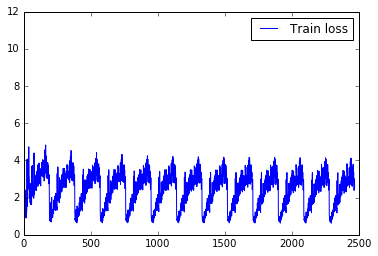

In [36]:
# Display the learning curve and losses for training, validation, and testing
% matplotlib inline
import matplotlib.pyplot as plt

plt.plot(net.losses['train'], label='Train loss')
# plt.plot(net.losses['valid'], label='Validation loss')
plt.legend()